### Step 1: Import Utility Functions and Classes

First, we need to import all the utility functions and classes from the `Utils1.py` file as shown below:


In [2]:
from Utils1 import *

### Step 2: Download MNIST Dataset

Next, we will download the MNIST dataset, which will be used for training. 



In [3]:
trainset = datasets.MNIST(
    '../MNIST_data/', train= True, download= True, transform= transform
)


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 9912422/9912422 [00:02<00:00, 3726380.80it/s]


Extracting ../MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to ../MNIST_data/MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 28881/28881 [00:00<00:00, 149914.10it/s]


Extracting ../MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to ../MNIST_data/MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 1648877/1648877 [00:01<00:00, 1409353.93it/s]


Extracting ../MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to ../MNIST_data/MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ../MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to ../MNIST_data/MNIST\raw



### Step 3: Split the Dataset

In this step, we will split the MNIST dataset into three equal parts: `part1`, `part2`, and `part3`. This allows us to simulate distributed or partitioned data scenarios, where different parts of the data are processed separately.

In [4]:
total_length = len(trainset)
split_size = total_length//3 
torch.manual_seed(42)
part1, part2, part3 = random_split(trainset, [split_size] *3)
 

### Step 4: Exclude Specific Digits from the Dataset Parts

Now, we will exclude specific digits from the three parts of the dataset using the `exclude_digits` function from the `Utils1.py` file. This step is crucial for simulating a scenario where different datasets are biased or lack certain classes.

- In `part1`, we will exclude digits 1, 3, and 7.
- In `part2`, we will exclude digits 2, 5, and 8.
- In `part3`, we will exclude digits 4, 6, and 9.

In [5]:
part1 = exlude_digits(part1, excluded_digits = [1,3,7])
part2 = exlude_digits(part2, excluded_digits=[2,5,8])
part3 = exlude_digits(part3, excluded_digits=[4,6,9])


### Step 5: Visualize the Split Datasets

To better understand the impact of excluding specific digits, we will visualize the three parts of the dataset. We utilize the `plot_distribution` function from the `Utils1.py` file to create plots that display the distribution of classes in each part. This will allow us to see which classes have been excluded.

We will create plots for each part as follows:

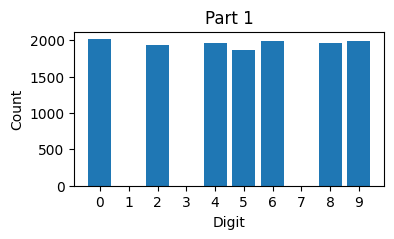

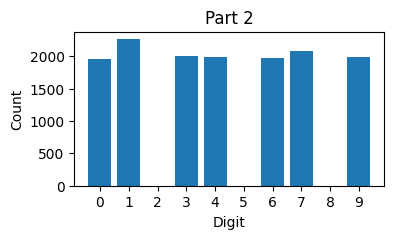

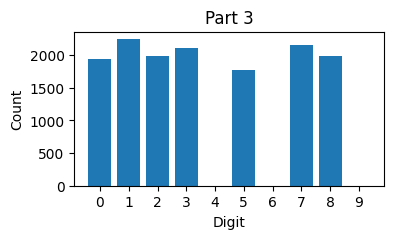

In [6]:
plot_distribution(part1, 'Part 1')
plot_distribution(part2, 'Part 2')
plot_distribution(part3, 'Part 3')

### Step 6: Train Three Different Models

In this step, we will train three different models using the individual datasets created from the splits. We will create instances of the `SimpleModel` class, which is defined in the `Utils1.py` file, and use the `train_model` function to train each model on its respective dataset.

The training process for each model is as follows:

In [7]:
model1 = SimpleModel()
print("************* Training of Model 1 start *****************")
train_model(model1, part1)
print("************* Training of Model 1 ended ***************** \n")


model2 = SimpleModel()
print("************* Training of Model 2 start *****************\n")
train_model(model2, part2)
print("************* Training of Model 2 ended ***************** \n")


model3 = SimpleModel()
print("************* Training of Model 3 start *****************\n")
train_model(model3, part3)
print("************* Training of Model 3 ended *****************")

************* Training of Model 1 start *****************
Epoch 1, loss: 0.5065381975021473
Epoch 2, loss: 0.24500493649826494
Epoch 3, loss: 0.19132229547167934
Epoch 4, loss: 0.15808401457792104
Epoch 5, loss: 0.13171680879800818
Epoch 6, loss: 0.11005786356277937
Epoch 7, loss: 0.09560647641503534
Epoch 8, loss: 0.08431707235096499
Epoch 9, loss: 0.07089465305122525
Epoch 10, loss: 0.061208425185015035
************* Training of Model 1 ended ***************** 

************* Training of Model 2 start *****************

Epoch 1, loss: 0.39834976848214865
Epoch 2, loss: 0.18235595813686295
Epoch 3, loss: 0.1642766258695961
Epoch 4, loss: 0.1346918814732427
Epoch 5, loss: 0.12096211042288425
Epoch 6, loss: 0.09922833488755194
Epoch 7, loss: 0.09154476819510039
Epoch 8, loss: 0.08096778186258494
Epoch 9, loss: 0.07251403643333885
Epoch 10, loss: 0.06491988140624017
************* Training of Model 2 ended ***************** 

************* Training of Model 3 start *****************

Epoc

### Step 7: Load Test Data

Now that we have trained our models, it's time to evaluate their performance. To do this, we first need to load the MNIST test dataset. This dataset will allow us to test the models on unseen data to assess their accuracy and generalization.

We can load the test dataset using the following code:

In [8]:
testset = datasets.MNIST(
    "../MNIST_dat", download= True, train= False, transform= transform
)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 9912422/9912422 [00:02<00:00, 4147491.48it/s]


Extracting ../MNIST_dat\MNIST\raw\train-images-idx3-ubyte.gz to ../MNIST_dat\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 28881/28881 [00:00<00:00, 147319.17it/s]


Extracting ../MNIST_dat\MNIST\raw\train-labels-idx1-ubyte.gz to ../MNIST_dat\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 1648877/1648877 [00:01<00:00, 1324196.20it/s]


Extracting ../MNIST_dat\MNIST\raw\t10k-images-idx3-ubyte.gz to ../MNIST_dat\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ../MNIST_dat\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../MNIST_dat\MNIST\raw



### Step 8: Prepare Test Data with Included Digits

To evaluate our models effectively, we will test them on a subset of the MNIST test dataset that includes the digits we previously excluded during training. This will help us understand the impact of missing data on the model's performance.

We utilize the `include_digits` function from the `Utils1.py` file to create three different test sets, each containing specific digits. The following code snippets demonstrate how we include the digits in our test sets:

In [9]:
test_137 = include_digits(testset, included_digits=[1,3,7])
test_258 = include_digits(testset, included_digits=[2,5,8])
test_469 = include_digits(testset, included_digits=[4,6,9])

### Step 9: Evaluate Model Performance

Now, we will assess the performance of each trained model using the `evaluate_model` function from the `Utils1.py` file. We will test each model on the entire test dataset as well as on the subsets that include the digits we previously excluded during training.

The following code demonstrates how we evaluate the accuracy of each model:

In [10]:
_, accuracy1 = evaluate_model(model1, testset)
_, accuracy1_on_137 = evaluate_model(model1, test_137)
print(f"Model_1 --> Test Accuracy on the entire digits: {accuracy1:4f} \n Test Accuracy on only [1,3,7] digits: {accuracy1_on_137}")
print("*"*40)
_, accuracy2 = evaluate_model(model2, testset)
_, accuracy2_on_258 = evaluate_model(model2, test_258)
print(f"Model_2 --> Test Accuracy on the entire digits: {accuracy2:4f} \n Test Accuracy on only [2,5,8] digits: {accuracy2_on_258}")
print("*"*40)
_,accuracy3 = evaluate_model(model3, testset)
_,accuracy3_on_469 = evaluate_model(model3, test_469)
print(f"Model_3 --> Test Accuracy on the entire digits: {accuracy3:4f} \n Test Accuracy on only [4,6,9] digits: {accuracy3_on_469}")

Model_1 --> Test Accuracy on the entire digits: 0.656900 
 Test Accuracy on only [1,3,7] digits: 0.0
****************************************
Model_2 --> Test Accuracy on the entire digits: 0.687200 
 Test Accuracy on only [2,5,8] digits: 0.0
****************************************
Model_3 --> Test Accuracy on the entire digits: 0.683600 
 Test Accuracy on only [4,6,9] digits: 0.0


### Step 10: Plotting the Confusion Matrix

For better visualization of our models' performance, we will plot the confusion matrix for each model. A confusion matrix is an evaluation metric that provides insights into the performance of each model by showing the correct and incorrect classifications for each class. 

The following code demonstrates how we compute and plot the confusion matrix for each model using the `compute_confusion_matrix` and `plot_confusion_matrix` functions from the `Utils1.py` file:

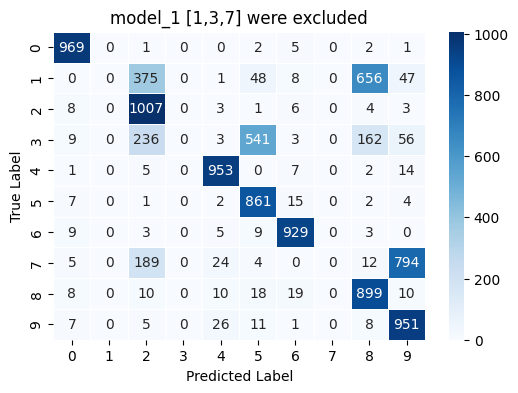

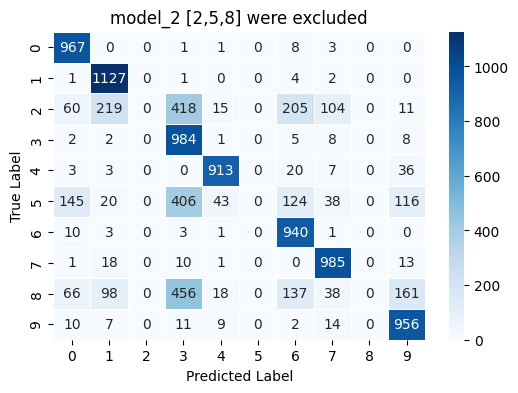

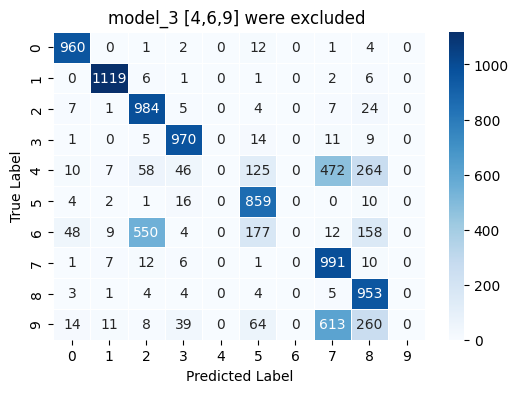

In [11]:
confusion_matrix_model1_all = compute_confusion_matrix(model1, testset)
confusion_matrix_model2_all = compute_confusion_matrix(model2, testset)
confusion_matrix_model3_all = compute_confusion_matrix(model3, testset)


plot_confusion_matrix(confusion_matrix_model1_all, "model_1 [1,3,7] were excluded")
plot_confusion_matrix(confusion_matrix_model2_all, "model_2 [2,5,8] were excluded" )
plot_confusion_matrix(confusion_matrix_model3_all, "model_3 [4,6,9] were excluded ")

### Final Remarks

The results highlight an important observation: if the model misses some parts of the data during training, it is possible that the model will make incorrect predictions, as demonstrated in the plots above. This limitation illustrates one of the significant challenges associated with centralized training of models.

In centralized training, the model relies heavily on the dataset it was trained on, which can lead to biases and gaps in understanding, especially when certain classes or patterns are excluded. Addressing these issues is crucial for improving model robustness and accuracy, particularly in real-world applications where data can be highly variable.

One of the best solutions for this problem is federated learning. By utilizing federated learning, we can enhance model training by leveraging data from multiple sources while maintaining data privacy. In the next notebook, **Federated_Model_Training**, we will go through all the federated steps to demonstrate how this approach can help mitigate the challenges faced in centralized training.
